# ĐÁNH GIÁ PHONG ĐỘ CẦU THỦ 5 TRẬN GẦN NHẤT

# Thêm thử viện và lọc dữ liệu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Yêu cầu người dùng nhập tên file CSV từ bàn phím
file_path = input("Nhập tên file CSV (bao gồm phần mở rộng): ")

# Đọc file CSV
player_data = pd.read_csv(file_path)

# Lọc các chỉ số cần thiết bao gồm cả vị trí
filtered_data = player_data[['name', 'match_id', 'position', 'totalPass', 'accuratePass', 'keyPass', 'goals', 'rating']].copy()

# Xử lý dữ liệu NaN
filtered_data.loc[:, filtered_data.columns[3:]] = filtered_data.loc[:, filtered_data.columns[3:]].fillna(0)  # Thay thế NaN bằng 0

# In ra dữ liệu đã xử lý
print(filtered_data)


          name  match_id position  totalPass  accuratePass  keyPass  goals  \
0  Cole Palmer  12437013        M         59            50        6    0.0   
1  Cole Palmer  12436989        M         25            17        4    4.0   
2  Cole Palmer  12436980        M         19            15        1    1.0   
3  Cole Palmer  12436931        M         30            25        1    0.0   
4  Cole Palmer  12436910        M         41            33        5    0.0   

   rating  
0     8.8  
1    10.0  
2     7.3  
3     7.1  
4     8.0  


# Lấy tên cầu thủ

In [3]:
# Hàm để phân loại vị trí cầu thủ
def classify_position(pos):
    if pos == 'F':
        return 'Tiền đạo'
    elif pos == 'M':
        return 'Tiền vệ'
    elif pos == 'D':
        return 'Hậu vệ'
    else:
        return 'Khác'

# Lấy tên cầu thủ và phân loại vị trí
player_name = filtered_data['name'][0]  # Tên cầu thủ
position = filtered_data['position'][0]   # Vị trí cầu thủ
position_description = classify_position(position)  # Phân loại vị trí

# Cập nhật tên cầu thủ để bao gồm thông tin vị trí
player_name_with_position = f"{player_name} ({position_description})"

print(player_name_with_position)


Cole Palmer (Tiền vệ)


# Tạo nhãn cho trục ngang (trận đấu 1, trận đấu 2,...)

In [4]:
x_labels = [f'Trận đấu {i+1}' for i in range(len(filtered_data))]

# Biểu đồ cột cho totalPass

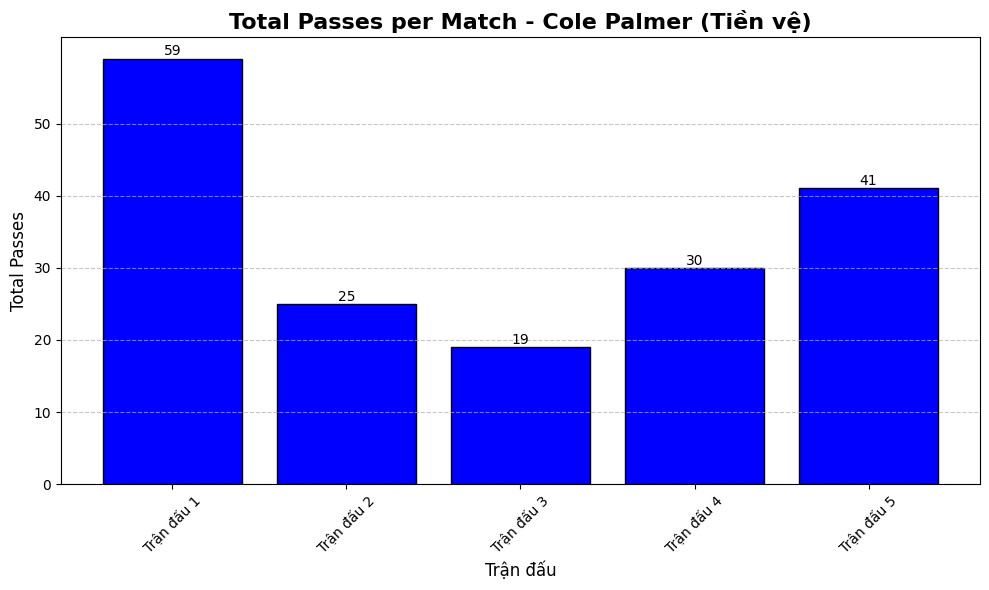

In [5]:
# Vẽ biểu đồ cột cho tổng số đường chuyền (total passes) mỗi trận
plt.figure(figsize=(10, 6))  # Thay đổi kích thước biểu đồ
bars = plt.bar(x_labels, filtered_data['totalPass'], color='blue', edgecolor='black')  # Thay đổi màu và thêm viền

plt.title(f'Total Passes per Match - {player_name_with_position}', fontsize=16, fontweight='bold')  # Cập nhật tiêu đề
plt.xlabel('Trận đấu', fontsize=12)
plt.ylabel('Total Passes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Thiết lập trục tung chỉ hiển thị từ 0 đến tổng số đường chuyền tối đa
plt.yticks(np.arange(0, max(filtered_data['totalPass']) + 1, 10), fontsize=10)  # Thiết lập trục tung

# Thêm lưới
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị số liệu trên đỉnh mỗi cột (điều chỉnh vị trí)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Bố trí hợp lý
plt.show()


# Biểu đồ cột cho accuratePass

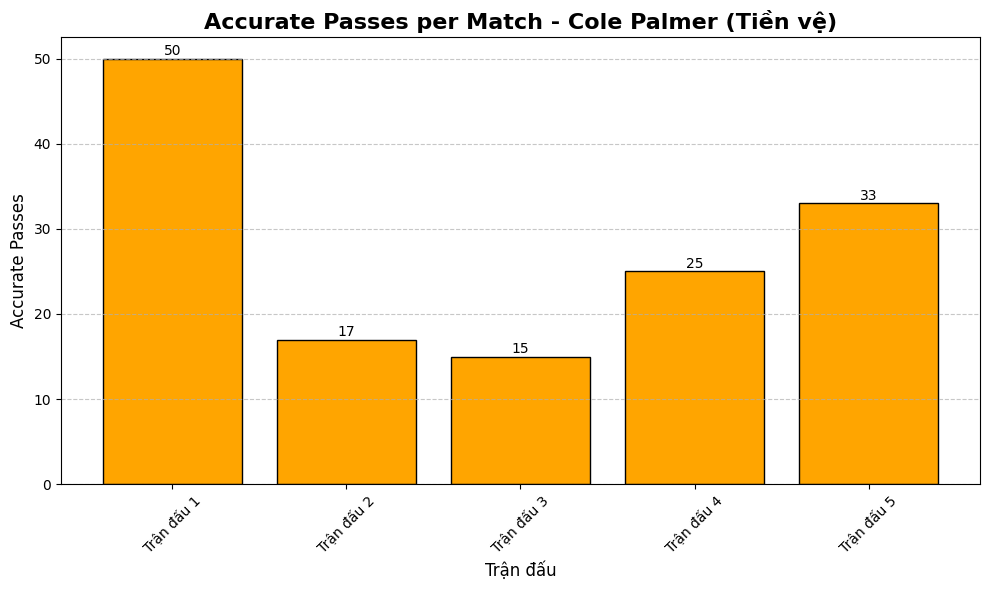

In [7]:
# Vẽ biểu đồ cột cho số lần chuyền bóng chính xác (accurate passes) mỗi trận
plt.figure(figsize=(10, 6))  # Thay đổi kích thước biểu đồ
bars = plt.bar(x_labels, filtered_data['accuratePass'], color='orange', edgecolor='black')  # Thay đổi màu và thêm viền

plt.title(f'Accurate Passes per Match - {player_name_with_position}', fontsize=16, fontweight='bold')  # Cập nhật tiêu đề
plt.xlabel('Trận đấu', fontsize=12)
plt.ylabel('Accurate Passes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Thiết lập trục tung chỉ hiển thị từ 0 đến số lần chuyền bóng chính xác tối đa
plt.yticks(np.arange(0, max(filtered_data['accuratePass']) + 1, 10), fontsize=10)  # Thiết lập trục tung

# Thêm lưới
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị số liệu trên đỉnh mỗi cột (điều chỉnh vị trí)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Bố trí hợp lý
plt.show()


# Biểu đồ cột cho keyPass

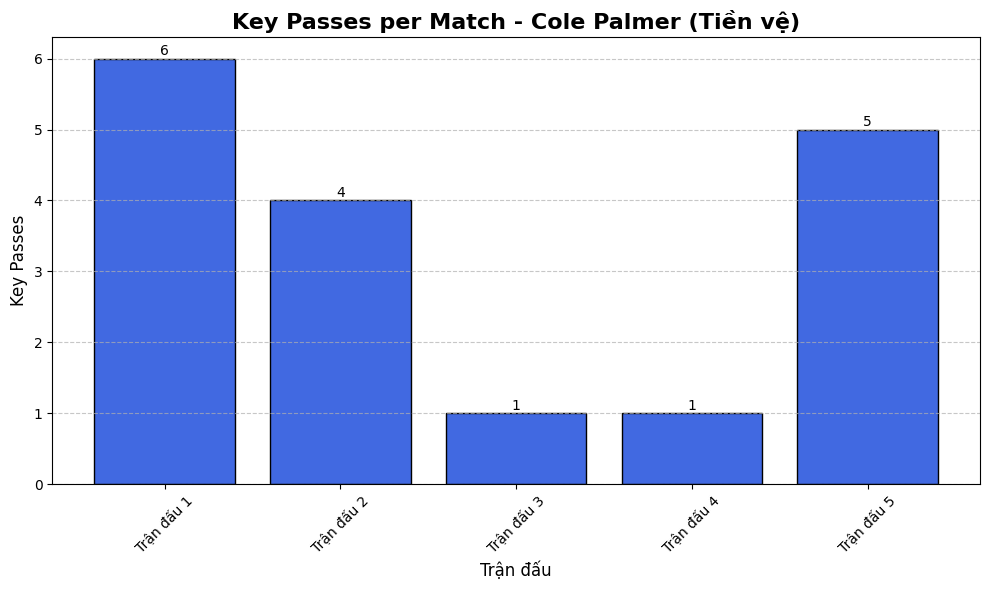

In [8]:
# Vẽ biểu đồ cột cho số lần kiến tạo (key passes) mỗi trận
plt.figure(figsize=(10, 6))  # Thay đổi kích thước biểu đồ
bars = plt.bar(x_labels, filtered_data['keyPass'], color='royalblue', edgecolor='black')  # Thay đổi màu và thêm viền

plt.title(f'Key Passes per Match - {player_name_with_position}', fontsize=16, fontweight='bold')  # Cập nhật tiêu đề
plt.xlabel('Trận đấu', fontsize=12)
plt.ylabel('Key Passes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Thiết lập trục tung chỉ hiển thị từ 0 đến số lần kiến tạo tối đa
plt.yticks(np.arange(0, max(filtered_data['keyPass']) + 1, 1), fontsize=10)  # Thiết lập trục tung

# Thêm lưới
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị số liệu trên đỉnh mỗi cột (điều chỉnh vị trí)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Bố trí hợp lý
plt.show()


# Biểu đồ cột cho goals

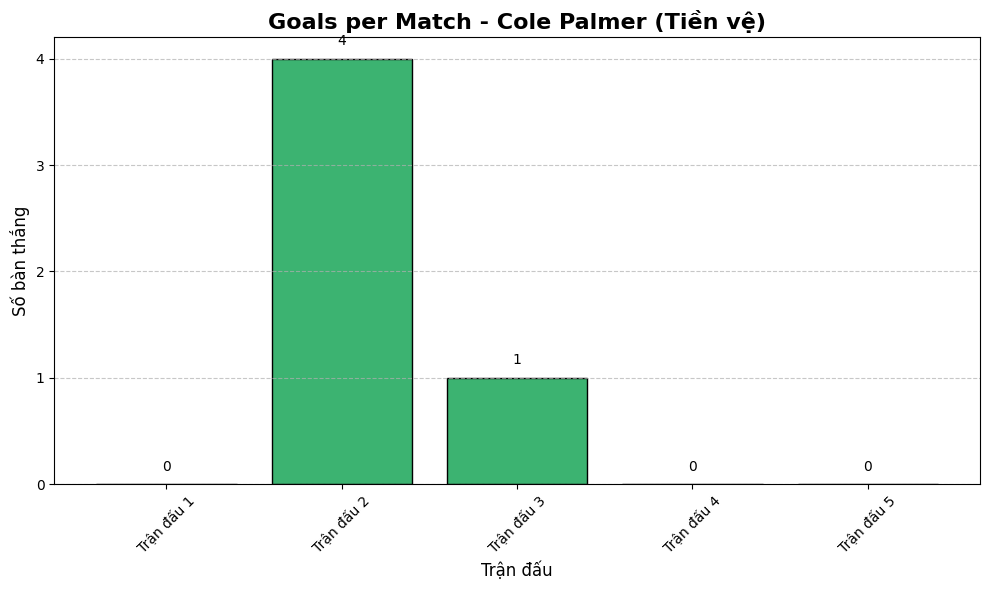

In [9]:

plt.figure(figsize=(10, 6))  # Thay đổi kích thước biểu đồ
bars = plt.bar(x_labels, filtered_data['goals'], color='mediumseagreen', edgecolor='black')  # Thay đổi màu và thêm viền

plt.title(f'Goals per Match - {player_name_with_position}', fontsize=16, fontweight='bold')  # Cập nhật tiêu đề với tên cầu thủ và vị trí
plt.xlabel('Trận đấu', fontsize=12)
plt.ylabel('Số bàn thắng', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Thiết lập trục tung chỉ hiển thị từ 0 đến số bàn thắng tối đa
plt.yticks(np.arange(0, max(filtered_data['goals']) + 1, 1), fontsize=10)  # Thiết lập trục tung

# Thêm lưới
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị số liệu trên đỉnh mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Bố trí hợp lý
plt.show()

# Biểu đồ cột cho rating

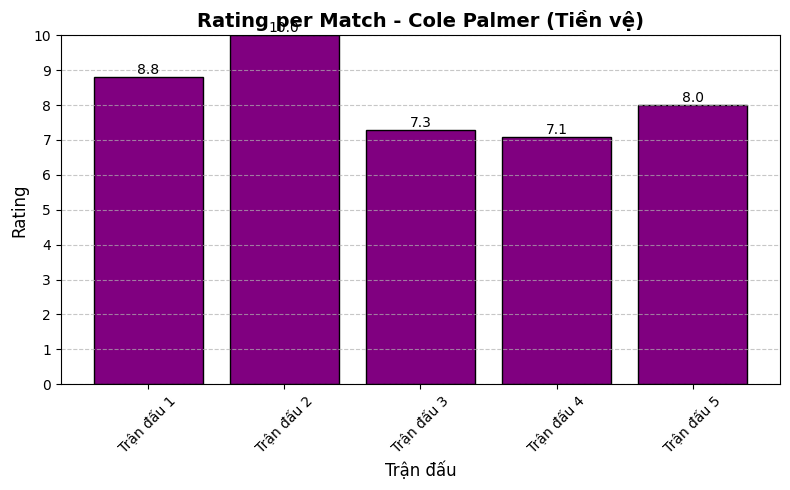

In [11]:
# Vẽ biểu đồ cột cho rating
plt.figure(figsize=(8, 5))
bars = plt.bar(x_labels, filtered_data['rating'], color='purple', edgecolor='black')  # Thêm viền cho cột
plt.title(f'Rating per Match - {player_name_with_position}', fontsize=14, fontweight='bold')  # Cập nhật tiêu đề
plt.xlabel('Trận đấu', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)

# Hiển thị số liệu trên đỉnh mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)

# Thêm lưới cho biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Đặt giới hạn cho trục Y
plt.ylim(0, 10)  # Đặt giới hạn từ 0 đến 10

# Thiết lập bước nhảy cho trục Y là 1
plt.yticks(range(0, 11))  # Hiển thị các nhãn từ 0 đến 10 với bước nhảy là 1

# Hiển thị biểu đồ
plt.tight_layout()  # Tự động căn chỉnh khoảng cách để đẹp hơn
plt.show()

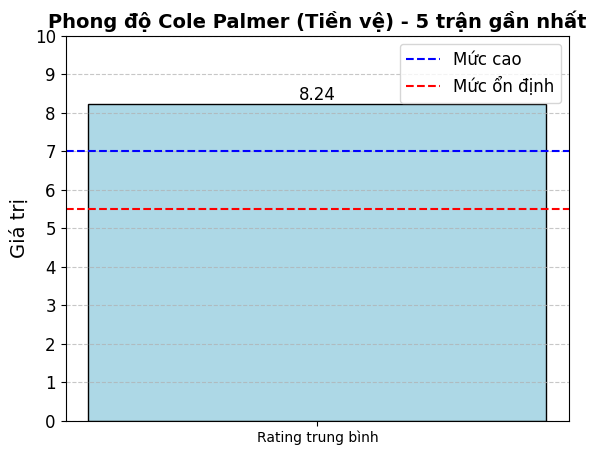

Đánh giá cầu thủ:
Phong độ Cao: Cầu thủ thể hiện phong độ tốt, có ảnh hưởng lớn đến kết quả trận đấu.


In [12]:
# Tính rating trung bình
average_rating = filtered_data['rating'].mean()

# Phân loại đánh giá
if average_rating < 5.5:
    evaluation = "Phong độ Thấp: Cầu thủ thường xuyên gặp khó khăn trong trận đấu, không có nhiều ảnh hưởng đến lối chơi và có thể bị thay ra."
elif 5.5 <= average_rating <= 7.0:
    evaluation = "Phong độ Ổn định: Cầu thủ thể hiện phong độ trung bình, đóng góp cho đội nhưng không phải là nhân tố chủ chốt."
else:
    evaluation = "Phong độ Cao: Cầu thủ thể hiện phong độ tốt, có ảnh hưởng lớn đến kết quả trận đấu."

# Tạo dữ liệu cho biểu đồ
evaluation_labels = ['Rating trung bình']
evaluation_scores = [average_rating]

# Cập nhật tên cầu thủ để bao gồm thông tin vị trí
player_name_with_position = f"{player_name} ({position_description})"

# Biểu đồ cột cho đánh giá cầu thủ
plt.figure(figsize=(6.5, 5))
bars = plt.bar(evaluation_labels, evaluation_scores, color='lightblue', edgecolor='black')  # Màu nhẹ nhàng cho cột

# Thiết lập tiêu đề và nhãn
plt.title(f'Phong độ {player_name_with_position} - 5 trận gần nhất', fontsize=14, fontweight='bold')
plt.ylabel('Giá trị', fontsize=14)
plt.ylim(0, 10)  # Đặt giới hạn cho trục Y từ 0 đến 10

# Thiết lập bước nhảy cho trục Y là 1
plt.yticks(range(0, 11), fontsize=12)  # Hiển thị các nhãn từ 0 đến 10 với bước nhảy là 1

# Thêm đường tham chiếu
plt.axhline(7.0, color='blue', linestyle='--', label='Mức cao')
plt.axhline(5.5, color='red', linestyle='--', label='Mức ổn định')

# Hiển thị số liệu trên đỉnh cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Thêm chú thích
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới để dễ đọc
plt.show()

# In ra đánh giá
print("Đánh giá cầu thủ:")
print(evaluation)